In [1]:
import pandas as pd
import warnings
import numpy as np
from ipywidgets import interactive
import matplotlib.pyplot as plt
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks


import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


# threshold=0.001

warnings.filterwarnings("ignore")

In [64]:


url = 'https://raw.githubusercontent.com/hamza93285/Laundry-Data-Analysis/master/Laundry_Data.csv'
data= pd.read_csv(url)


# Data Preprocessing

In [3]:
import math
for i in range(len(data)):
    val=data['Kids_Category'].iloc[i]
    if type(val)==str:
        continue
    if math.isnan(val):
        if data['With_Kids'].iloc[i]=='no':
            data['Kids_Category'].iloc[i]='no_kids'
            

    

In [4]:
for i in range(len(data)):
    val=data['With_Kids'].iloc[i]
    if type(val)==str:
        continue
    if math.isnan(val):
        if type(data['Kids_Category'].iloc[i])==str:
            if data['Kids_Category'].iloc[i]=='no_kids':
                data['With_Kids'].iloc[i]='no'
            else:
                data['With_Kids'].iloc[i]='yes'


data['Age_Range']=pd.cut(data['Age_Range'],bins=[27,34,41,48,55,np.inf],labels=['27+','34+','41+','48+','54+'])



In [5]:
####Missing value
all_cols=['Basket_Size', 'Basket_colour', 'Attire','Shirt_Colour', 'shirt_type', 'Pants_Colour', 'pants_type', 'Wash_Item']

for col in all_cols:
    data[col]=data[col].fillna('unkown')
    
    
data['Race']=data['Race'].fillna('unkown')
data['Gender']=data['Gender'].fillna('unkown')
data['Body_Size']=data['Body_Size'].fillna('unkown')
data['Age_Range']=data['Age_Range'].fillna('27+')

data['With_Kids']=data['With_Kids'].fillna('unkown')
data['Kids_Category']=data['Kids_Category'].fillna('unkown')
    

In [6]:
#associateMinning_data=data.copy()

# Feature Engineering 

In [7]:
def hour_to_Daypart(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'
    
    
    
    
data['Time']=pd.to_datetime(data['Time'])
data['Hour']=data['Time'].dt.hour
data['Day_part']=data['Hour'].apply(hour_to_Daypart)


In [8]:
data['Date']=pd.DatetimeIndex(data.Date)
data['Month_name']=data.Date.dt.month_name()

In [9]:

cal = calendar()
holidays = cal.holidays(start=data.Date.min(), end=data.Date.max())
data['Holiday'] = data['Date'].isin(holidays)

In [10]:
data['Is_WEEKDAY'] = ((pd.DatetimeIndex(data.Date).dayofweek) // 5 == 1).astype(float)
data['Weekday_or_Weekend'] =np.where(((pd.DatetimeIndex(data.Date).dayofweek)) < 5,'Weekday','Weekend')
data.drop(['No','Date','Time','Is_WEEKDAY','Hour'],axis=1,inplace=True)
data['Holiday'] =np.where(((data.Holiday)==True),'Holiday','Not_Holiday')

# Exploratory Data Analysis

In [11]:
sample=data.copy()
washer_y=sample['Washer_No'].values
dryer_y=sample['Dryer_No'].values
sample.drop(['Washer_No','Dryer_No'],axis=1,inplace=True)
X=sample.copy()

In [12]:
encoded_data=data.copy()
from sklearn import preprocessing
for col in data.columns:
#     print(col)
    if (col=='Washer_No') or (col=='Dryer_No'):
        continue
    le = preprocessing.LabelEncoder()
    encoded_data[col]=le.fit_transform(encoded_data[col])



<h6>Correlation Between Variables </h6>

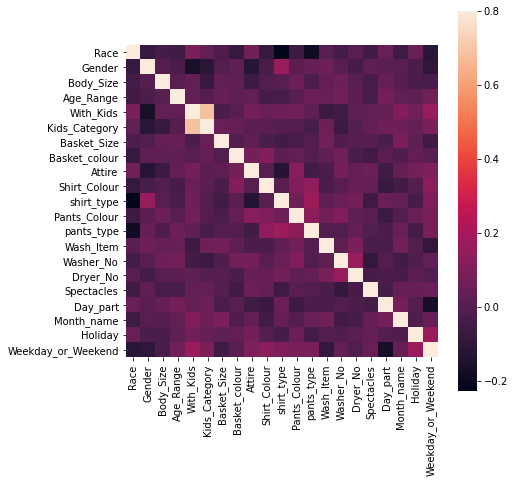

In [13]:
corrmat = encoded_data.corr()

f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

In [14]:

corrmat


,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,Day_part,Month_name,Holiday,Weekday_or_Weekend
Race,1.000000,-0.082968,-0.040149,-0.048776,0.095903,0.029524,-0.017866,-0.081207,0.065632,-0.079364,...,-0.064441,-0.183658,0.008815,-0.039363,0.007864,-0.051536,0.047682,-0.058607,0.045482,-0.114056
Gender,-0.082968,1.000000,0.004053,-0.020890,-0.160414,-0.112773,-0.007181,0.028681,-0.120546,-0.030273,...,0.018262,0.042962,0.059499,0.009319,-0.037142,0.026201,0.013279,0.005626,-0.026832,-0.098155
Body_Size,-0.040149,0.004053,1.000000,0.010433,0.033353,-0.078111,0.033493,0.026753,-0.065526,-0.007238,...,0.054832,-0.015386,0.038130,0.064767,0.010854,-0.030007,0.042747,0.004880,-0.024486,-0.030330
Age_Range,-0.048776,-0.020890,0.010433,1.000000,0.030516,0.004078,0.041612,0.026019,0.035033,-0.032885,...,0.012749,0.055951,0.045671,0.065435,0.017227,-0.029379,0.079180,0.032181,0.021877,0.065235
With_Kids,0.095903,-0.160414,0.033353,0.030516,1.000000,0.685299,-0.025322,0.005442,0.078596,0.051724,...,0.072667,0.021319,-0.060517,-0.047031,0.023072,0.029978,0.033463,0.105542,0.071432,0.166849
Kids_Category,0.029524,-0.112773,-0.078111,0.004078,0.685299,1.000000,0.047184,0.043150,0.016408,0.017041,...,-0.006019,-0.029339,0.061033,-0.065045,-0.002491,0.036885,0.059755,0.061604,0.038978,0.097306
Basket_Size,-0.017866,-0.007181,0.033493,0.041612,-0.025322,0.047184,1.000000,-0.010908,0.027586,-0.026224,...,-0.023366,-0.010462,0.072457,-0.013364,0.002088,0.004360,-0.019626,0.092330,0.021556,-0.054033
Basket_colour,-0.081207,0.028681,0.026753,0.026019,0.005442,0.043150,-0.010908,1.000000,0.076813,0.112996,...,0.034431,-0.005076,0.023733,0.070380,-0.025816,-0.048781,0.012464,-0.011384,0.035964,0.011305
Attire,0.065632,-0.120546,-0.065526,0.035033,0.078596,0.016408,0.027586,0.076813,1.000000,0.011948,...,0.118244,-0.043757,-0.020216,0.080295,0.044995,0.055982,-0.051882,0.034715,0.073594,0.100545
Shirt_Colour,-0.079364,-0.030273,-0.007238,-0.032885,0.051724,0.017041,-0.026224,0.112996,0.011948,1.000000,...,0.103150,0.145452,-0.023524,0.006557,0.042402,0.040462,-0.071725,-0.044296,-0.000424,0.129533


<h6>Correlation Between Variables and Washer_No</h6>

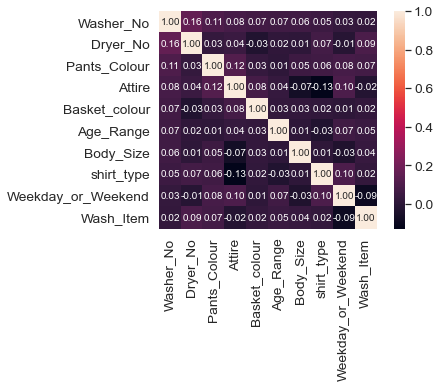

In [15]:
k = 10 
cols = corrmat.nlargest(k, 'Washer_No')['Washer_No'].index
cm = np.corrcoef(encoded_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<h6>Correlation Between Variables and Dryer_No</h6>

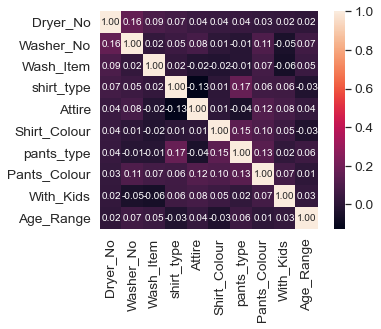

In [16]:
k = 10 
cols = corrmat.nlargest(k, 'Dryer_No')['Dryer_No'].index
cm = np.corrcoef(encoded_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:

# sns.set()
# cols = encoded_data.columns
# sns.pairplot(encoded_data[cols], size = 2.5)
# plt.show()

<h6>Class Imblanace</h6>

In [18]:
encoded_data.drop(['Washer_No','Dryer_No'],axis=1,inplace=True)

Text(0.5, 0.98, 'Washer_No Before SMOTENC for Class Imbalance')

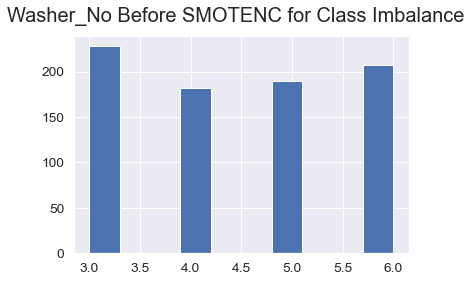

In [19]:
fig, ax = plt.subplots()
data['Washer_No'].hist()
fig.suptitle('Washer_No Before SMOTENC for Class Imbalance', fontsize=20)

In [20]:

from imblearn.over_sampling import SMOTENC

sm = SMOTENC(random_state=42,categorical_features=[i for i in range(len(data.columns)-3)])
washer_X, washer_Y = sm.fit_resample(encoded_data, washer_y)
dryer_X, dryer_Y = sm.fit_resample(encoded_data, dryer_y)

In [21]:
washer_X=pd.DataFrame(washer_X,columns=encoded_data.columns)
dryer_X=pd.DataFrame(dryer_X,columns=encoded_data.columns)

Text(0.5, 0.98, 'Washer_No After SMOTENC for Class Imbalance')

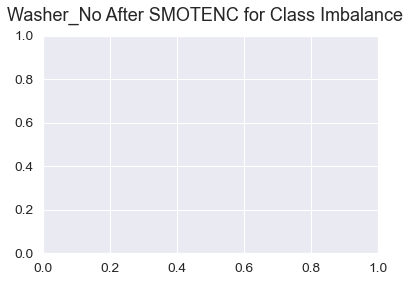

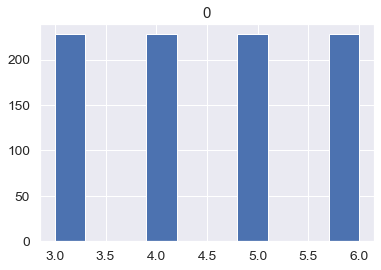

In [22]:
fig, ax = plt.subplots()
pd.DataFrame(washer_Y).hist()
fig.suptitle('Washer_No After SMOTENC for Class Imbalance')


In [23]:
def important_features(X,y):
    model = ExtraTreesClassifier()
    model.fit(X,y)

    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    plt.figure(figsize=(10, 10))
    feat_importances.nlargest(48).plot(kind='barh')
    plt.show()
    
    
    model1 = SelectFromModel(model, prefit=True) 
    New_features = model1.transform(X)
    
    feature_idx = model1.get_support()
    feature_name = X.columns[feature_idx]

    new_feat=pd.DataFrame(X,columns=feature_name)
    
    return new_feat

    
    
    
    

<h5> Feature Importance for Washer No</h5>

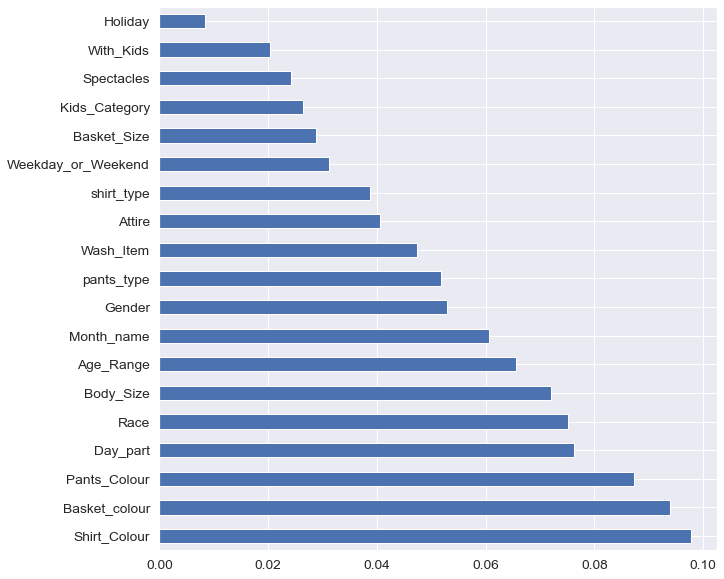

In [24]:
washer_feat=important_features(washer_X,washer_Y)

<h5> Feature Importance for Dryer No</h5>

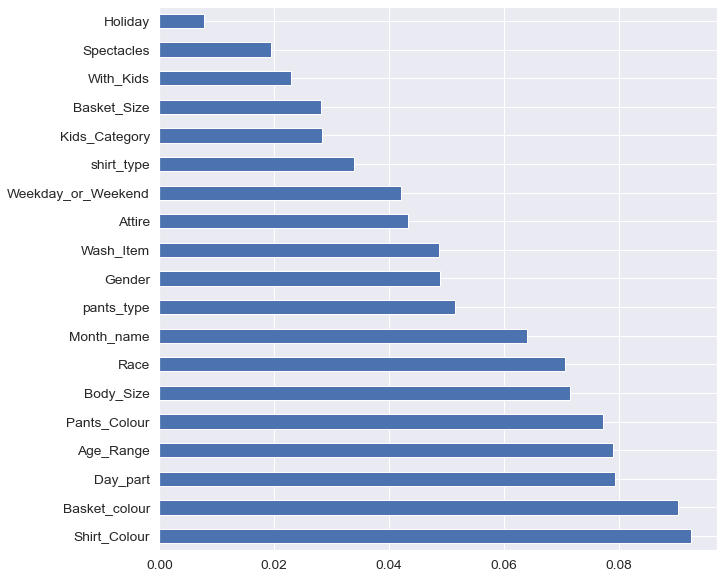

In [66]:
dryer_feat=important_features(dryer_X,dryer_Y)

In [232]:

# test_feat=pd.DataFrame(test_feature,columns=feature_name)


# Exploratory Data Analysis

<h5> Basket size and Dryer number </h5>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DAE96748>,
      dtype=object)

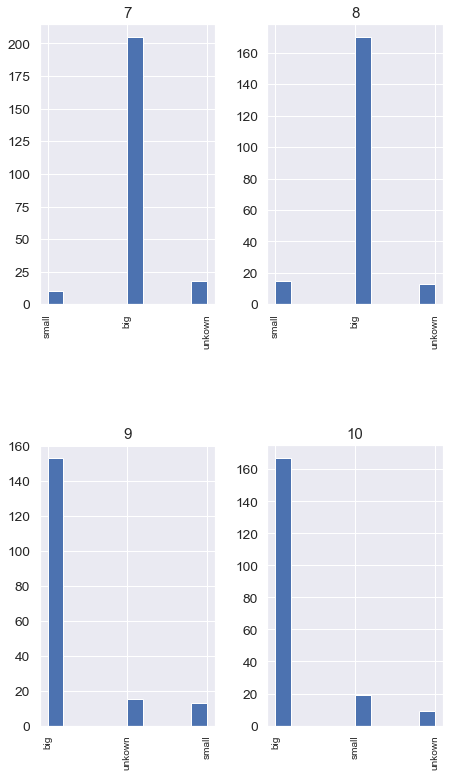

In [238]:
data[['Basket_Size','Dryer_No']].Basket_Size.hist(by=data.Dryer_No,xlabelsize=10,figsize=(7,13))

<h5> Basket size and Washer number </h5>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DB1F8438>,
      dtype=object)

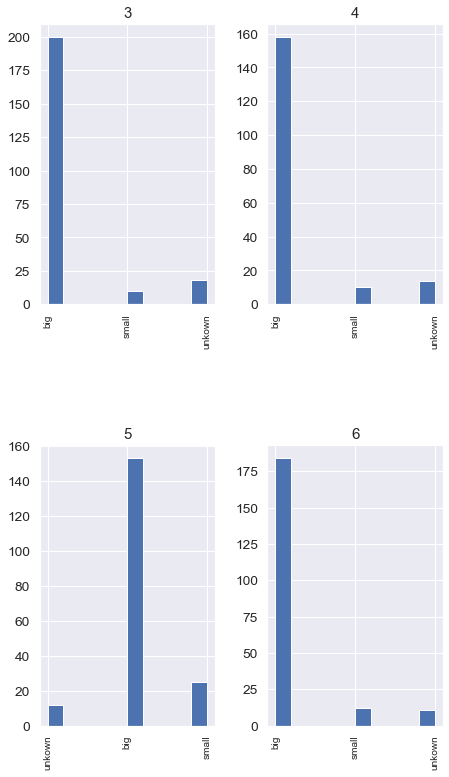

In [239]:
data[['Basket_Size','Washer_No']].Basket_Size.hist(by=data.Washer_No,xlabelsize=10,figsize=(7,13))

<h5> Gender and Daypart</h5>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219327F1748>,
      dtype=object)

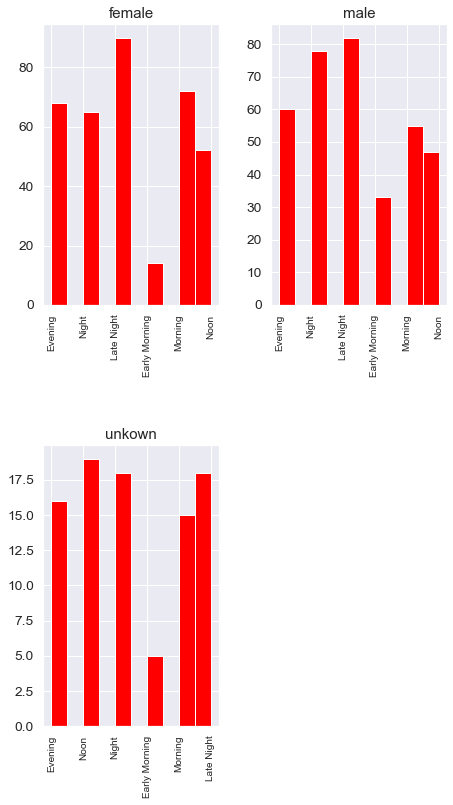

In [337]:
data[['Day_part','Gender']].Day_part.hist(by=data.Gender,xlabelsize=10,figsize=(7,13),color = "red")

<h5> Race and Gender </h5>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DB941B38>,
      dtype=object)

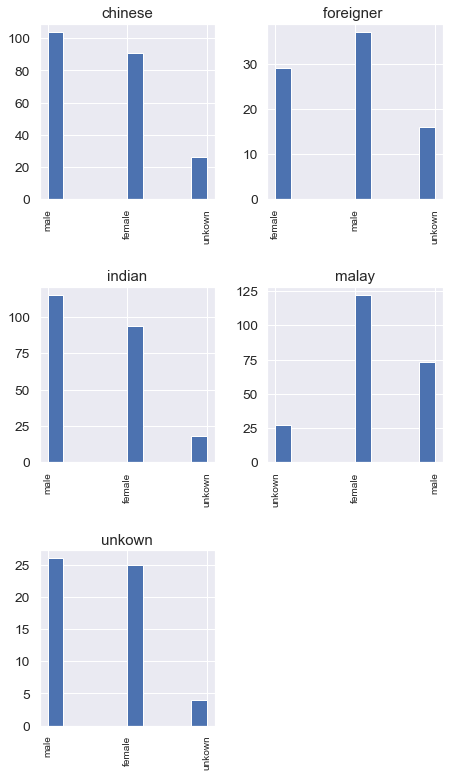

In [241]:
data[['Race','Gender']].Gender.hist(by=data.Race,xlabelsize=10,figsize=(7,13))

<h5> Race and Kids </h5>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021932ECCBE0>,
      dtype=object)

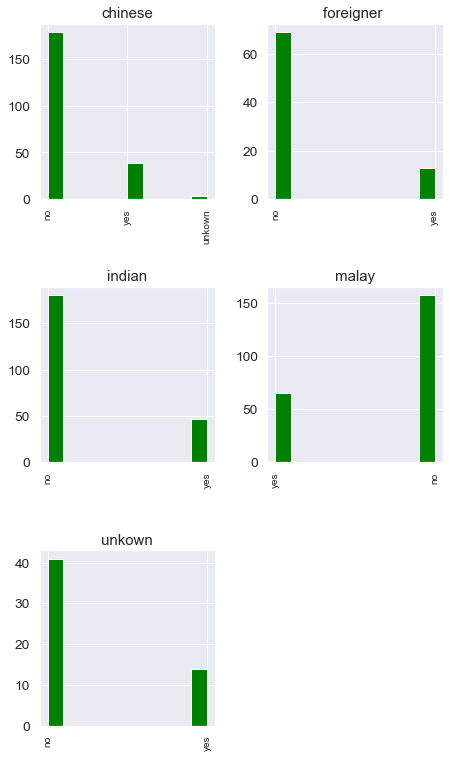

In [339]:
data[['Race','With_Kids']].With_Kids.hist(by=data.Race,xlabelsize=10,figsize=(7,13),color='green')

<h5> Race and Attire </h5>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DBD4E320>,
      dtype=object)

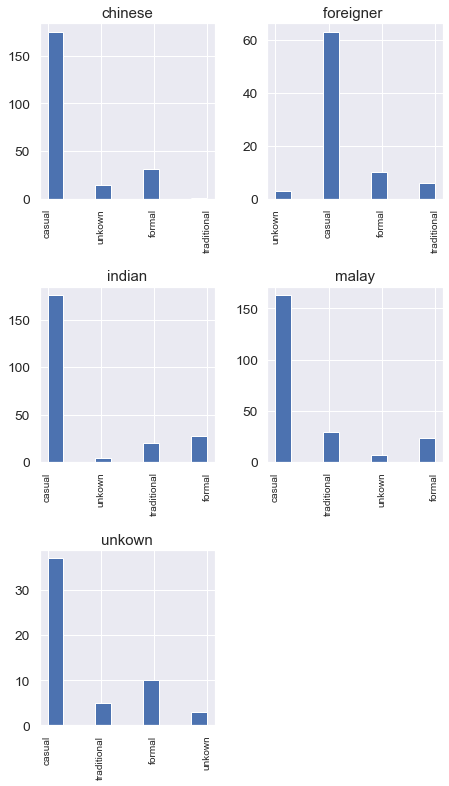

In [243]:
data[['Race','Attire']].Attire.hist(by=data.Race,xlabelsize=10,figsize=(7,13))

<h5> Race and (Weekday or weekend)</h5>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021933581860>,
      dtype=object)

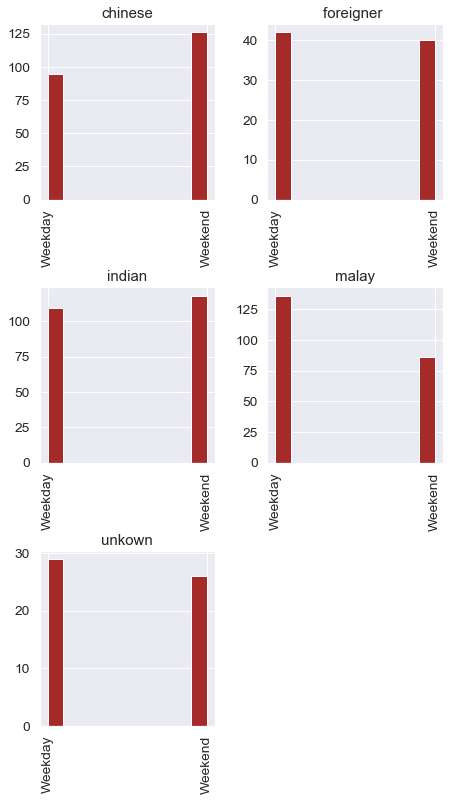

In [343]:
data[['Race','Weekday_or_Weekend']].Weekday_or_Weekend.hist(by=data.Race,figsize=(7,13),color='brown')

<h5> Race</h5>

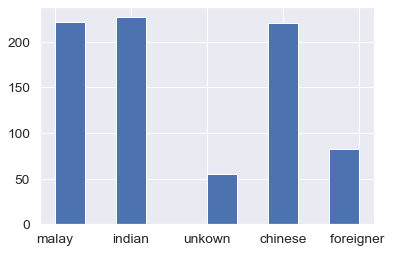

In [247]:
data['Race'].hist()

<h5> Age Ranges </h5>

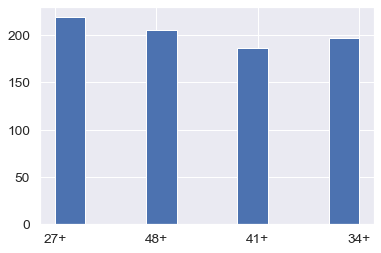

In [248]:
data['Age_Range'].hist()

In [249]:
# encoded_data['Washer_No']=data['Washer_No']
# encoded_data['Dryer_No']=data['Dryer_No']

# Modeling 

In [67]:
from apyori import apriori

def train_associative_mining(data,cond=True):
    if cond==True:
        association_rules = apriori(data, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=4)
        association_results = list(association_rules)
        it=iter(association_rules)
        while True:
            try:
                item = next(it)
            except StopIteration:
                break
            print(item)

            pair = item[0] 
            items = [x for x in pair]
            print("Rule: " + items[0] + " -> " + items[1])

    return 

In [68]:
train_associative_mining(data,False)

# Classification

# Washer Number Prediction 

In [251]:
import numpy as np
from sklearn.model_selection import train_test_split

XW_train, XW_test, yw_train, yw_test = train_test_split( washer_feat,washer_Y, test_size=0.45, random_state=42)

In [252]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

random_Forest = tree.DecisionTreeClassifier()

# random_Forest = RandomForestClassifier(max_depth=2, random_state=0)
random_Forest.fit(XW_train, yw_train.reshape(-1, 1))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h5> Classfication report of Decision Tree on Washer Number Prediction</h5>

In [253]:
from sklearn.metrics import classification_report
target_names = ['Washer 3', 'Washer 4', 'Washer 5','Washer 6']
y_pred=random_Forest.predict(XW_test)
print(classification_report(yw_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Washer 3       0.46      0.41      0.43       106
    Washer 4       0.33      0.31      0.32       105
    Washer 5       0.44      0.49      0.46       100
    Washer 6       0.39      0.42      0.41       100

    accuracy                           0.41       411
   macro avg       0.41      0.41      0.41       411
weighted avg       0.41      0.41      0.41       411



<h5> Confusion matric of Decision Tree on Washer Number Prediction</h5>

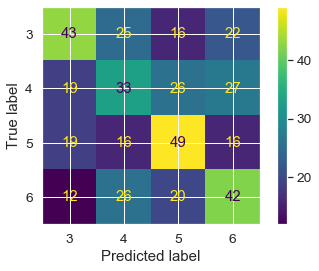

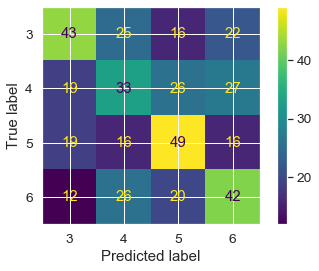

In [254]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_Forest, XW_test, yw_test).plot() 

In [255]:
# from sklearn.datasets import load_iris

# X, y = load_iris(return_X_y=True)
# clf = LogisticRegression(random_state=0).fit(X, y)

In [256]:


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(XW_train, yw_train)

 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h5> Classfication report of Logistic Regression on Washer Number Prediction</h5>

In [257]:
from sklearn.metrics import classification_report
target_names = ['Washer 3', 'Washer 4', 'Washer 5','Washer 6']
y_pred=lr.predict(XW_test)
print(classification_report(yw_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Washer 3       0.31      0.26      0.29       106
    Washer 4       0.37      0.30      0.34       105
    Washer 5       0.32      0.31      0.31       100
    Washer 6       0.28      0.38      0.32       100

    accuracy                           0.31       411
   macro avg       0.32      0.31      0.31       411
weighted avg       0.32      0.31      0.31       411



<h5> Confusion matrix of Logistic Regression on Washer Number Prediction</h5>

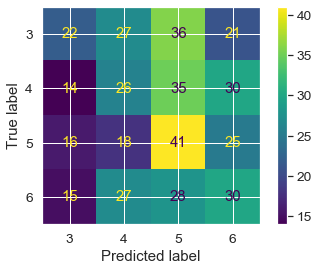

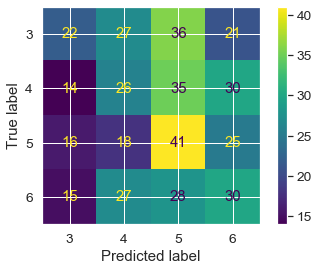

In [258]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, XW_test, yw_test).plot() 

# Dryer Number Prediction 

In [259]:
XD_train, XD_test, yd_train, yd_test = train_test_split( dryer_feat,dryer_Y, test_size=0.45, random_state=42)


In [260]:
import numpy as np
from sklearn.model_selection import train_test_split



from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix

In [261]:
random_Forest = tree.DecisionTreeClassifier()

# random_Forest = RandomForestClassifier(max_depth=2, random_state=0)
random_Forest.fit(XD_train, yd_train.reshape(-1, 1))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h5> Classfication report of Decision Tree on Dryer Number Prediction</h5>

In [262]:

# from sklearn.metrics import classification_report
target_names = ['Dryer 7', 'Dryer 8','Dryer 9','Dryer 10']
y_pred=random_Forest.predict(XD_test)
print(classification_report(yd_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Dryer 7       0.24      0.24      0.24       105
     Dryer 8       0.36      0.37      0.36       104
     Dryer 9       0.32      0.28      0.30       108
    Dryer 10       0.29      0.33      0.31       103

    accuracy                           0.30       420
   macro avg       0.30      0.30      0.30       420
weighted avg       0.30      0.30      0.30       420



<h5> CConfusion  Matrxi of Decision Tree on Dryer Number Prediction</h5>

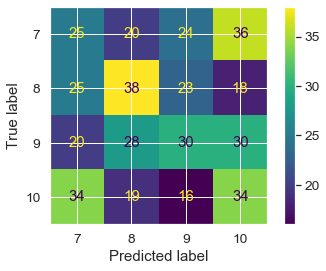

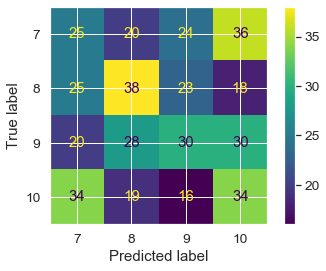

In [263]:
plot_confusion_matrix(random_Forest, XD_test, yd_test).plot() 

In [264]:
lr = LogisticRegression(random_state=0)
lr.fit(XD_train, yd_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h5> Classfication report of Logistic Regression on Dryer Number Prediction</h5>

In [266]:
target_names = ['Dryer 7', 'Dryer 8','Dryer 9','Dryer 10']
y_pred=lr.predict(XD_test)
print(classification_report(yd_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Dryer 7       0.24      0.20      0.22       105
     Dryer 8       0.31      0.42      0.36       104
     Dryer 9       0.28      0.19      0.23       108
    Dryer 10       0.29      0.32      0.30       103

    accuracy                           0.28       420
   macro avg       0.28      0.28      0.28       420
weighted avg       0.28      0.28      0.28       420



<h5> Confusion Matrix of Logistic Regression on Dryer Number Prediction</h5>

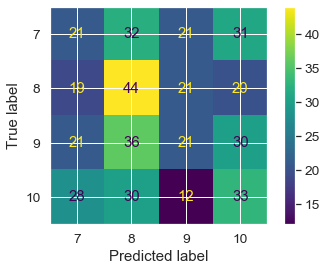

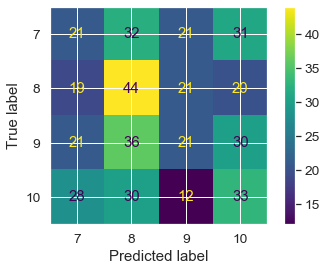

In [267]:
plot_confusion_matrix(lr, XD_test, yd_test).plot() 

# Clustering 

In [268]:
# !pip install kmodes

In [26]:
from kmodes.kmodes import KModes

In [43]:
cost = []
for num_clusters in list(range(1,15)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=0)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

<h5> Number of cluster vs cost </h5>

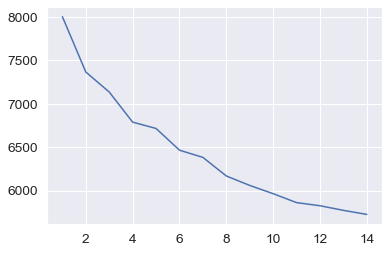

In [44]:
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,15,1)])
plt.plot(y,cost)

In [52]:
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=0)
fitClusters_cao = km_cao.fit_predict(data)

In [53]:
data_cust = data.reset_index()

In [54]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

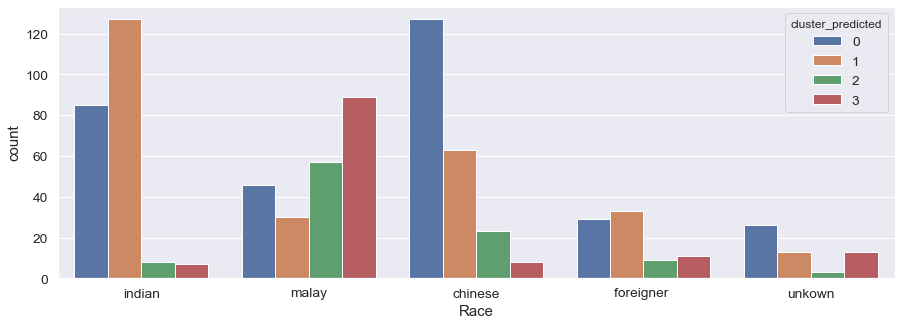

In [55]:

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Race'],order=combinedDf['Race'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

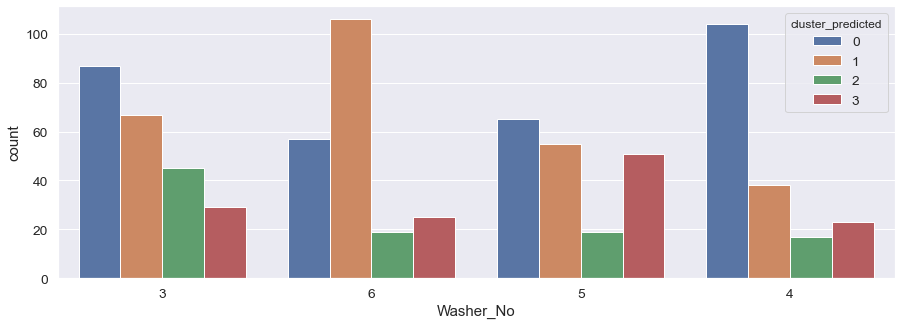

In [56]:

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Washer_No'],order=combinedDf['Washer_No'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()